![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

## Load Package and Data

In [15]:
suppressPackageStartupMessages(library(tidyverse))
data <- readr::read_csv("data/plants_and_bees.csv", show_col_types = FALSE)
head(data)

sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,null,0,ground,null,0
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,null,0,ground,null,0
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,null,0,ground,null,0
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,null,0,ground,null,0
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,null,0,ground,null,0
17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Apis mellifera,f,null,0,hive,null,1


## Detect Missing Value
#### There is no missing value in our dataset

In [16]:
sum(is.na(data))

[1] 0

## Feature Summary
#### We have 16 columns and 1250 rows without any missing value.

In [17]:
glimpse(data)

Rows: 1,250
Columns: 16
$ sample_id      <dbl> 17400, 17400, 17400, 17400, 17400, 17400, 17400, 17400,…
$ species_num    <dbl> 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23,…
$ date           <chr> "04/18/2017", "04/18/2017", "04/18/2017", "04/18/2017",…
$ season         <chr> "early.season", "early.season", "early.season", "early.…
$ site           <chr> "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", "A", …
$ native_or_non  <chr> "native", "native", "native", "native", "native", "nati…
$ sampling       <chr> "pan traps", "pan traps", "pan traps", "pan traps", "pa…
$ plant_species  <chr> "None", "None", "None", "None", "None", "None", "None",…
$ time           <dbl> 935, 935, 935, 935, 935, 935, 935, 935, 935, 935, 935, …
$ bee_species    <chr> "Augochlorella aurata", "Agapostemon texanus", "Augochl…
$ sex            <chr> "f", "f", "f", "f", "m", "f", "f", "f", "f", "f", "f", …
$ specialized_on <chr> "null", "null", "null", "null", "null", "null", "null",…
$ parasitic     

## Which plants are preferred by native vs non-native bee species?

#### Let's separate our native and non-native bees and look into their propotion
#### - 92.32% of the bees are non-native and 2.8% of them are native bees. The rest of 4.88% are not specifed species.

In [18]:
native_bee <- data %>% filter(nonnative_bee == '1')
non_bee <- data %>% filter(nonnative_bee == '0')

non <- non_bee %>% summarise(nonnative_bee_prop = n()/1250 * 100)
native <- native_bee %>% summarise(native_bee_prop = n()/1250 * 100)
merge(non,native)

nonnative_bee_prop,native_bee_prop
<dbl>,<dbl>
92.32,2.8


#### To see which plants the bees preferred, we have to pick the sample from hand netting sampling process because pan traps sampling doesn't tell us which plants are the bees from.

In [19]:
data %>% select(sampling,plant_species) %>% filter(sampling == 'pan traps') %>% head()

sampling,plant_species
<chr>,<chr>
pan traps,None
pan traps,None
pan traps,None
pan traps,None
pan traps,None
pan traps,None


### Plot bar chart to see distribution of plants between native and non-native bees.
#### - With tiny amount of native bees, we can't really tell if they preferred Trifolium incarnatum and Daucus carota. We have to look further in the next tasks.
#### - Looks like non-native bees preferred leucanthemum Vulgare which is non-native plant and Rudbeckia Hirta which is native plant.

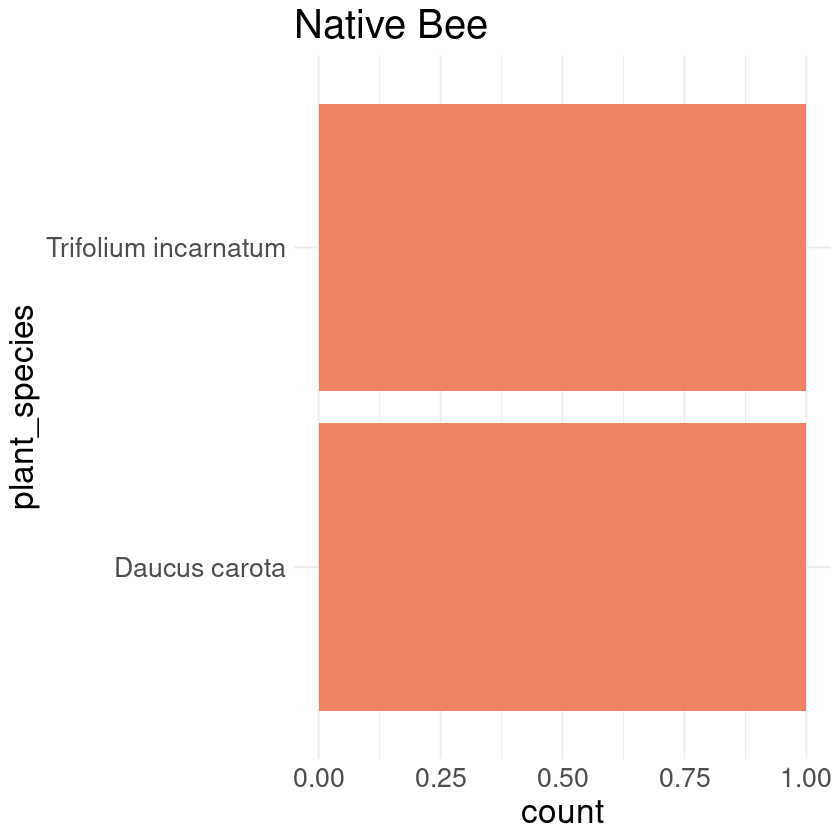

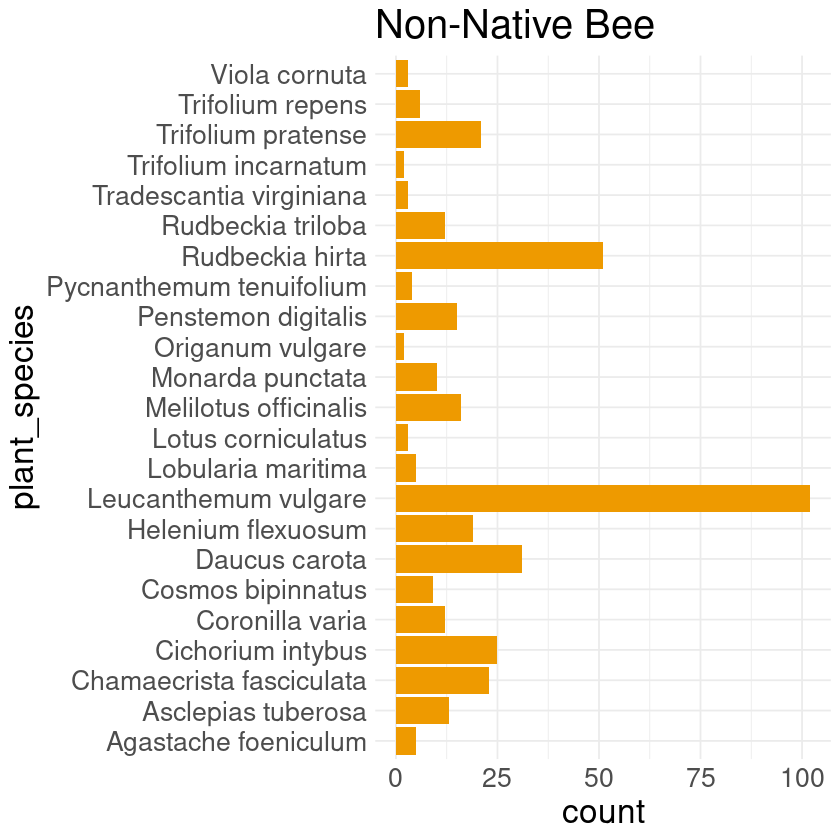

In [20]:
ggplot(native_bee %>% filter(sampling == 'hand netting'), aes(plant_species)) +
geom_bar(fill = 'salmon2') +
coord_flip() +
theme_minimal() +
theme(text = element_text(size = 20)) +
labs( title = 'Native Bee')

ggplot(non_bee %>% filter(sampling == 'hand netting'), aes(plant_species)) +
geom_bar(fill = 'orange2') +
coord_flip() +
theme_minimal() +
theme(text = element_text(size = 20)) +
labs( title = 'Non-Native Bee')

## A visualization of the distribution of bee and plant species across one of the samples.

#### Distribution of bee species in each site
#### - Looks like we've found Halictus poeyi/ligatus is the most observations in all of 3 sites
#### - Augochlorella aurota is one of the most observations in all 3 sites

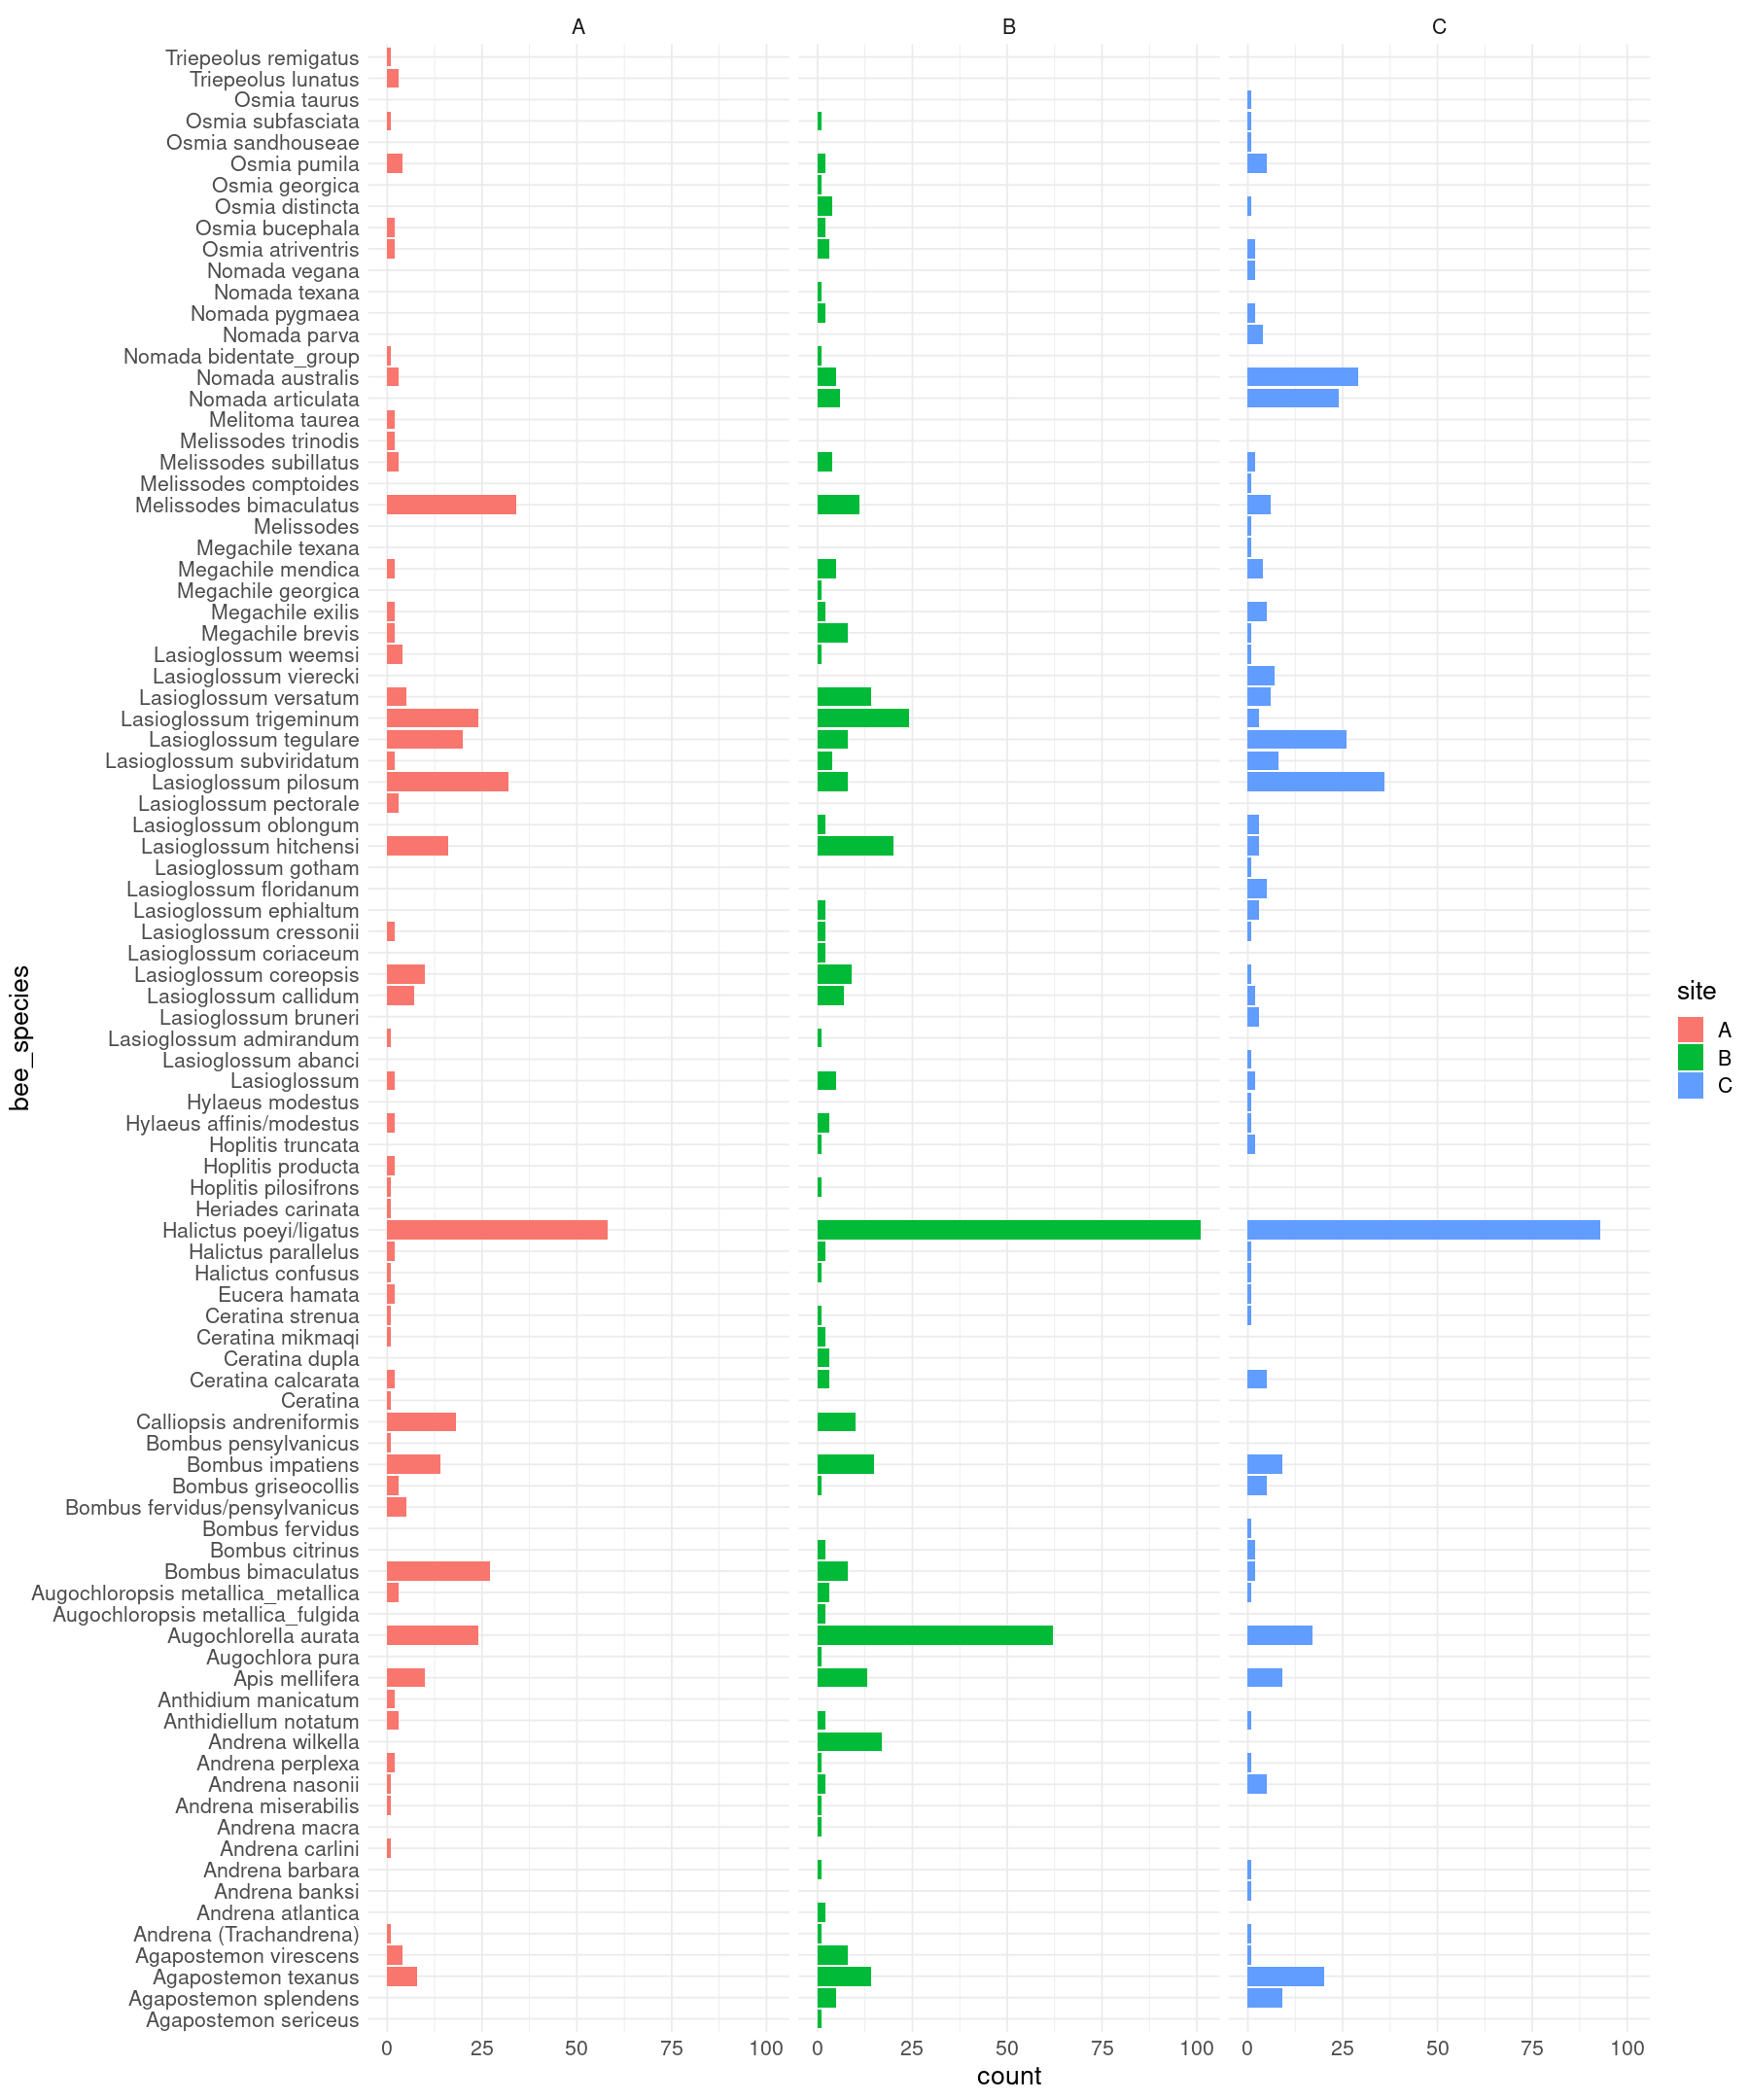

In [21]:
options(repr.plot.width=15, repr.plot.height=18)
ggplot(data , aes(bee_species, fill =site)) +
geom_bar() +
coord_flip() +
facet_wrap(~site) +
theme_minimal() +
theme(text = element_text(size = 16)) 

#### Distribution of plant species in each site
#### - We filter out the those 'None' because we focussing on plant species not the one collected from air
#### - Leucanthemum vulgare is the most observations in all 3 sites following with Rudbeckia hirta

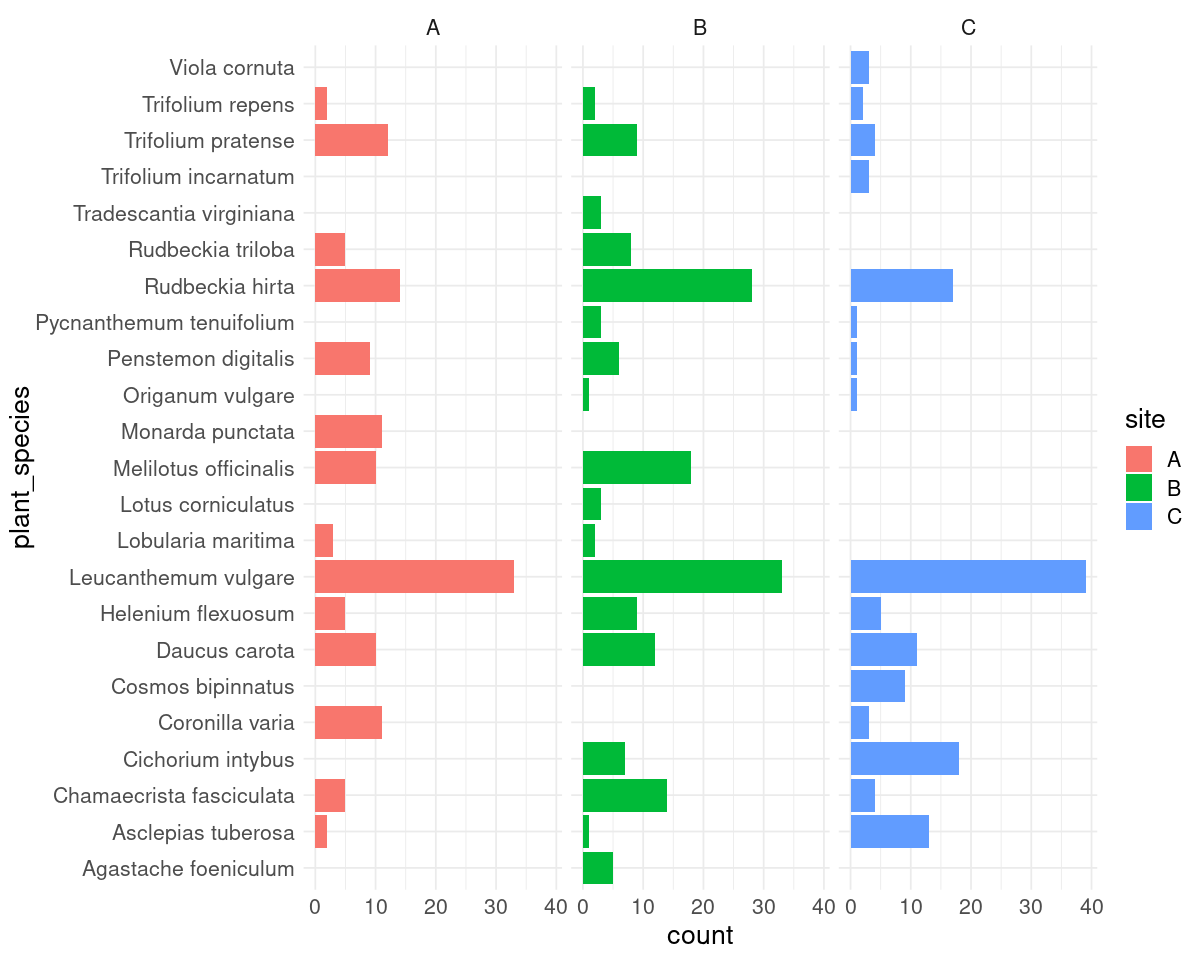

In [22]:
options(repr.plot.width=10, repr.plot.height=8)
ggplot(data %>% filter(plant_species != 'None'), aes(plant_species, fill =site)) +
geom_bar() +
coord_flip() +
facet_wrap(~site) +
theme_minimal() +
theme(text = element_text(size = 16))


## Select the top three plant species you would recommend to the agency to support native bees.

### From the previous task, we know that the most observations of plant species are Leucanthemum vulgare and Rudbeckia hirta. Let's dig into them if we find any insight.
#### - Some of the bees collected from leucanthemum vulgare look like they are parasitic which is not looks good.
#### - Most of Rudbeckia hirta are collected in early season from site B and C and it is a native plant. The bees collected from Rudbeckia hirta seems fine with none of them are parasitic.
#### - Rudbeckia hirta looks perfect for our native bees. Let's look further for more native plants like Rudbeckia hirta.

In [23]:
data %>% filter(plant_species %in% c('Leucanthemum vulgare','Rudbeckia hirta'))

sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Ceratina strenua,f,null,0,wood,null,0
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Andrena (Trachandrena),m,null,null,ground,null,null
17409,10,05/02/2017,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,null,0,ground,null,0


### Let's dig deeper into plant species that similar to Rudbeckia hirta.

In [24]:
(plants <- data %>% filter(season == 'early.season' & site %in% c('B','C'), native_or_non == 'native'
				, parasitic == '0', sampling == 'hand netting'))

sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
17420,1,05/16/2017,early.season,B,native,hand netting,Tradescantia virginiana,1020,Lasioglossum callidum,f,null,0,ground,null,0
17431,1,05/26/2017,early.season,B,native,hand netting,Penstemon digitalis,1420,Augochlorella aurata,f,null,0,ground,null,0
17431,2,05/26/2017,early.season,B,native,hand netting,Tradescantia virginiana,1420,Hoplitis truncata,m,null,0,wood,null,0
17431,2,05/26/2017,early.season,B,native,hand netting,Tradescantia virginiana,1420,Lasioglossum trigeminum,f,null,0,ground,null,0
17435,1,05/26/2017,early.season,C,native,hand netting,Penstemon digitalis,1220,Hoplitis truncata,m,null,0,wood,null,0
17443,1,06/13/2017,early.season,B,native,hand netting,Asclepias tuberosa,1520,Augochlorella aurata,f,null,0,ground,null,0
17443,5,06/13/2017,early.season,B,native,hand netting,Penstemon digitalis,1520,Ceratina mikmaqi,f,null,0,wood,null,0
17443,5,06/13/2017,early.season,B,native,hand netting,Penstemon digitalis,1520,Osmia distincta,f,Penstemon,0,null,uncommon,0
17443,5,06/13/2017,early.season,B,native,hand netting,Penstemon digitalis,1520,Osmia distincta,f,Penstemon,0,null,uncommon,0


### Now we have some plant species to recommend our agency to save the native bees.

### Top 3 plant species picked from most observations:
#### 1. Rudbeckia hirta
#### 2. Asclepias tuberosa
#### 3. Penstemon digitalis

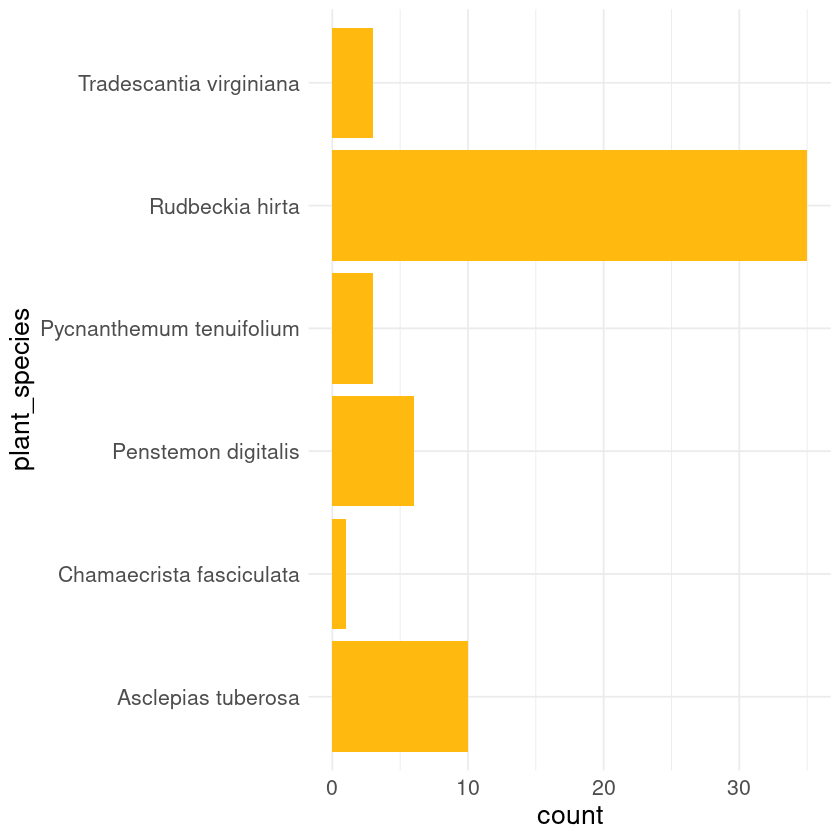

In [25]:
options(repr.plot.width=7, repr.plot.height=7)
ggplot(plants, aes(plant_species)) +
geom_bar(fill = 'darkgoldenrod1') +
coord_flip() +
theme_minimal() +
theme(text = element_text(size = 16))